In [1]:
import os
import sys

# Add ../src to the list of available Python packages
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

from docknet.docknet import Docknet
from docknet.data_generator.island_data_generator import IslandDataGenerator
from docknet.initializer.random_normal_initializer import RandomNormalInitializer
from docknet.optimizer.gradient_descent_optimizer import GradientDescentOptimizer
from docknet.optimizer.adam_optimizer import AdamOptimizer

In [3]:
def scatterplot(axe, X, Y, title, files, rows, index, x0_range, x1_range):
    axe.scatter(X[0, :], X[1, :], c=Y[0:], s=2)
    aspect = (x0_range[1] - x0_range[0]) / (x1_range[1] - x1_range[0])
    axe.set_aspect(aspect)
    axe.set_title(title)
    axe.set_xlim(x0_range)
    axe.set_ylim(x1_range)
    axe.set_xlabel('x0')
    axe.set_ylabel('x1')

In [4]:
train_size = 2000
test_size = 400
x0_range = (-5., 5.)
x1_range = (-5., 5.)

In [5]:
data_generator = IslandDataGenerator(x0_range, x1_range)
X_train, Y_train = data_generator.generate_balanced_shuffled_sample(train_size)
X_test, Y_test = data_generator.generate_balanced_shuffled_sample(test_size)

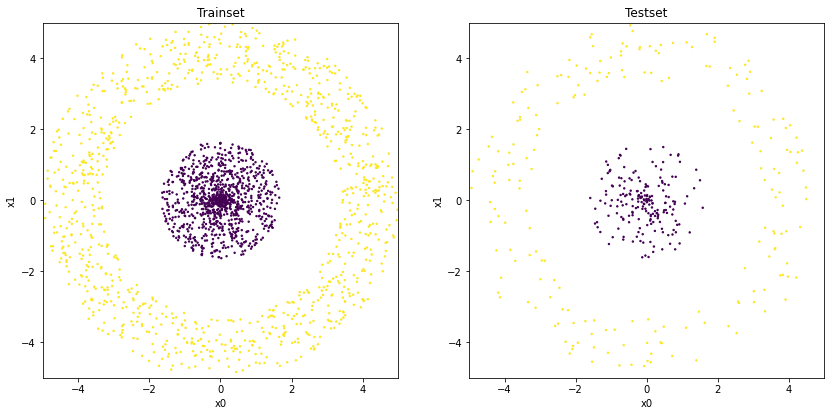

In [6]:
plt.rcParams['figure.figsize'] = [14, 7]
f, axes = plt.subplots(nrows=1, ncols=2)
scatterplot(axes[0], X_train, Y_train, 'Trainset', 1, 2, 1, x0_range, x1_range)
scatterplot(axes[1], X_test, Y_test, 'Testset', 1, 2, 2, x0_range, x1_range)
plt.show()

In [7]:
docknet = Docknet()
docknet.add_input_layer(2)
docknet.add_dense_layer(3, 'relu')
docknet.add_dense_layer(1, 'sigmoid')
docknet.initializer = RandomNormalInitializer()
docknet.cost_function = 'cross_entropy'
docknet.optimizer = AdamOptimizer()

In [8]:
np.random.seed(1)
epochs = 200
batch_size = round(train_size / 10.)
epoch_errors, iteration_errors = docknet.train(X_train, Y_train, batch_size, max_number_of_epochs=epochs)

Loss after epoch 1: 0.6863525031787306
Loss after epoch 2: 0.6366735209159122
Loss after epoch 3: 0.5481353405838006
Loss after epoch 4: 0.45444183791727755
Loss after epoch 5: 0.37017396311196993
Loss after epoch 6: 0.3059876784321175
Loss after epoch 7: 0.26239756285302174
Loss after epoch 8: 0.22993366135911517
Loss after epoch 9: 0.20521485661066746
Loss after epoch 10: 0.1858038914799162
Loss after epoch 11: 0.1700338169529195
Loss after epoch 12: 0.15693280721476194
Loss after epoch 13: 0.1458820544290944
Loss after epoch 14: 0.13640474890907445
Loss after epoch 15: 0.12815429986883511
Loss after epoch 16: 0.12090007345808935
Loss after epoch 17: 0.11447694106143282
Loss after epoch 18: 0.10873371616778656
Loss after epoch 19: 0.1035637896516018
Loss after epoch 20: 0.09889074757662662
Loss after epoch 21: 0.09462328148691536
Loss after epoch 22: 0.09071285534800658
Loss after epoch 23: 0.08712663015659403
Loss after epoch 24: 0.08382301439127014
Loss after epoch 25: 0.0807660825

Loss after epoch 197: 0.009200347336118941
Loss after epoch 198: 0.009138318303154584
Loss after epoch 199: 0.00907691268716925
Loss after epoch 200: 0.009016116262464562


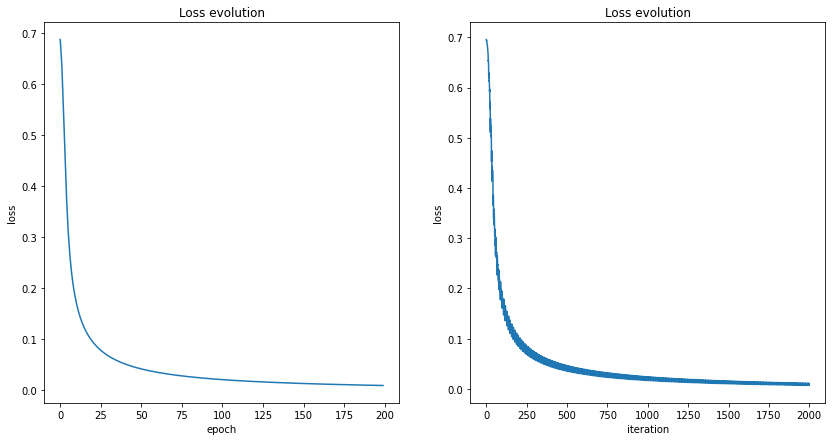

In [9]:
plt.subplot(1, 2, 1)
plt.plot(epoch_errors)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss evolution")
plt.subplot(1, 2, 2)
plt.plot(iteration_errors)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Loss evolution")
plt.show()

In [10]:
Y_predicted = docknet.predict(X_test)
Y_predicted = np.round(Y_predicted)
correct = Y_predicted == Y_test
wrong = Y_predicted != Y_test
X_correct = X_test[:, correct.reshape(test_size)]
Y_correct = Y_test[correct]
X_wrong = X_test[:, wrong.reshape(test_size)]
Y_wrong = Y_test[wrong]

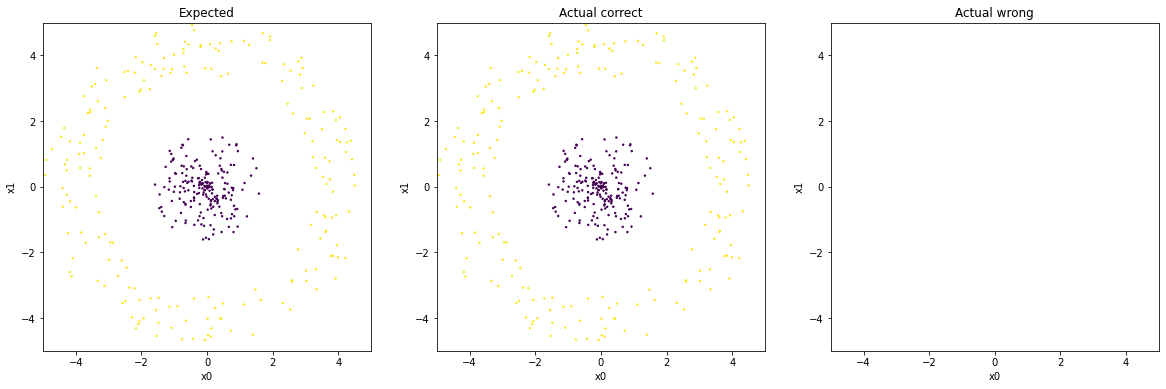

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(nrows=1, ncols=3)
scatterplot(axes[0], X_test, Y_test, 'Expected', 1, 3, 1, x0_range, x1_range)
scatterplot(axes[1], X_correct, Y_correct, 'Actual correct', 1, 3, 2, x0_range, x1_range)
scatterplot(axes[2], X_wrong, Y_wrong, 'Actual wrong', 1, 3, 3, x0_range, x1_range)
plt.show()

In [12]:
results = metrics.classification_report(Y_test[0], Y_predicted[0])
print(results)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       200
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [13]:
conf_matrix = metrics.confusion_matrix(Y_test[0], Y_predicted[0])
print(conf_matrix)

[[200   0]
 [  0 200]]
